In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

with open('experiment.json', 'r') as f:
    table = json.load(f)


In [3]:
models = pd.DataFrame(table)
models

,ImageSize,PretrainedModel,Dataset,Precision,Recall,F1Score,Speed,AP@0.50,AP@0.55,AP@0.60,AP@0.65,AP@0.70,AP@0.75,AP@0.80,AP@0.85,AP@0.90,AP@0.95
0,1024,yolov8n.pt,/.yolo.0/data.yaml,0.277778,83.333333,0.553710,2.470446,32.667822,29.809556,24.282445,19.584586,9.576803,5.138693,1.414048,0.244261,0.008661,0.008661
1,1024,yolov8n.pt,/.yolo.1/data.yaml,0.126263,37.878788,0.251686,1.743526,0.101076,0.087514,0.050845,0.021158,0.011362,0.008257,0.002604,0.000000,0.000000,0.000000
2,1024,yolov8n.pt,/.yolo.2/data.yaml,0.052335,49.618321,0.104560,9.071336,0.040776,0.033500,0.027193,0.020546,0.016105,0.009682,0.003522,0.001688,0.000407,0.000000
3,1024,yolov8n.pt,/.yolo.3/data.yaml,93.105110,90.909091,91.993997,12.156404,93.593750,93.593750,93.593750,91.678571,91.678571,81.715357,71.540000,47.241071,11.182857,0.000000
4,1024,yolov8s.pt,/.yolo.0/data.yaml,50.240139,53.030303,51.597529,1.306412,42.190221,42.190221,38.806329,38.699002,31.917906,22.976208,10.436855,1.022704,0.102029,0.000000
5,1024,yolov8s.pt,/.yolo.1/data.yaml,47.823715,25.757576,33.481961,1.771763,30.151489,26.948824,24.447776,21.531364,14.027492,2.995731,1.018884,0.251432,0.007714,0.000000
6,1024,yolov8s.pt,/.yolo.2/data.yaml,20.542088,19.735716,20.130830,6.093432,10.028220,10.028220,10.027552,9.768255,9.179664,7.626112,7.109714,3.299685,0.746091,0.000000
7,1024,yolov8s.pt,/.yolo.3/data.yaml,100.000000,99.080417,99.538085,5.654002,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,66.135200,20.618800,0.000000,0.000000
8,1024,yolo11n.pt,/.yolo.0/data.yaml,63.264838,44.365935,52.156156,2.453750,45.730842,42.502310,38.848220,34.424249,31.959506,24.001963,11.293773,0.504850,0.000000,0.000000
9,1024,yolo11n.pt,/.yolo.1/data.yaml,0.015152,4.545455,0.030202,1.751123,0.007982,0.005240,0.005240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
# select top performing models
top = models.sort_values(by=['AP@0.50'], ascending=False)[0:3][["ImageSize", "PretrainedModel", "Dataset", "Precision","Recall", "Speed", "AP@0.50"]]

top

,ImageSize,PretrainedModel,Dataset,Precision,Recall,Speed,AP@0.50
7,1024,yolov8s.pt,/.yolo.3/data.yaml,100.000000,99.080417,5.654002,99.500000
3,1024,yolov8n.pt,/.yolo.3/data.yaml,93.105110,90.909091,12.156404,93.593750
15,1024,yolo11s.pt,/.yolo.3/data.yaml,85.049217,72.727273,9.621463,82.473029


In [30]:
# plot them
# evaluate using custom metric ( certain presence in video )

# select best performing model, toy with augmentations
with open('curves.json', 'r') as f:
    table = json.load(f)

curves = pd.DataFrame(table)

# curves['AP@0.50'] =

curves.sort_values().head()

,index,name,x,y,x_label,y_label
0,0,Precision-Recall(B),"[0.0, 0.001001001001001001, 0.0020020020020020...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",Recall,Precision
1,0,F1-Confidence(B),"[0.0, 0.001001001001001001, 0.0020020020020020...","[0.005537098560354374, 0.005537098560354374, 0...",Confidence,F1
2,0,Precision-Confidence(B),"[0.0, 0.001001001001001001, 0.0020020020020020...","[0.002777777777777778, 0.002777777777777778, 0...",Confidence,Precision
3,0,Recall-Confidence(B),"[0.0, 0.001001001001001001, 0.0020020020020020...","[0.8333333333333334, 0.8333333333333334, 0.833...",Confidence,Recall
4,1,Precision-Recall(B),"[0.0, 0.001001001001001001, 0.0020020020020020...","[0.001653130166031769, 0.001653130166031769, 0...",Recall,Precision


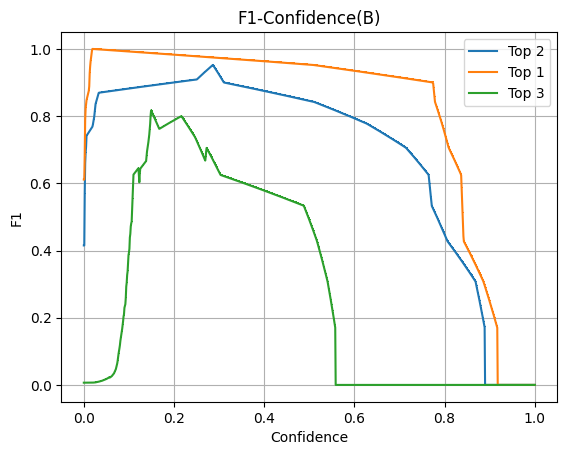

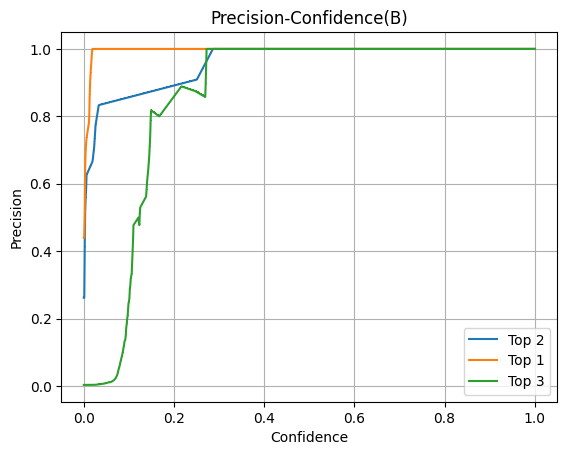

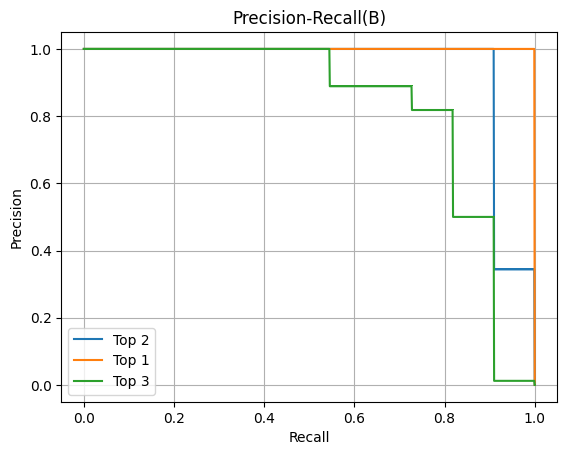

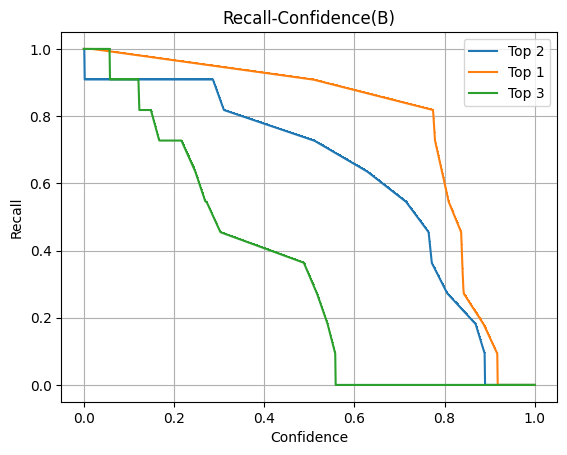

In [54]:
import matplotlib.pyplot as plt

model_label = {
    i:f"Top {nr}" for nr, i in enumerate(top.index, start=1)
}

for plot_name, curvez in curves[curves["index"].isin(top.index)].groupby('name'):

    for model_idx, data in curvez.groupby('index'):
        plt.plot(data.iloc[0]['x'], data.iloc[0]['y'], marker=',', label=model_label[model_idx])

    plt.xlabel(data.iloc[0]['x_label'])
    plt.ylabel(data.iloc[0]['y_label'])

    plt.title(plot_name)
    plt.grid(True)
    plt.legend()
    plt.show()
